In [2]:
using QuantumOptics
using Plots
using LinearAlgebra

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (2))


In [5]:
import Pkg; Pkg.status()

Status `~/.julia/environments/v1.11/Project.toml`
  [a93c6f00] DataFrames v1.7.0
⌃ [0c46a032] DifferentialEquations v7.11.0
  [b7d42ee7] Einsum v0.4.1
  [7073ff75] IJulia v1.25.0
  [b964fa9f] LaTeXStrings v1.4.0
  [91a5bcdd] Plots v1.40.8
  [c3e4b0f8] Pluto v0.20.0
  [7f904dfe] PlutoUI v0.7.60
  [92933f4c] ProgressMeter v1.10.2
⌃ [6e0679c1] QuantumOptics v1.0.9
  [295af30f] Revise v3.6.2
  [10745b16] Statistics v1.11.1
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [215]:
N = 40
b = NLevelBasis(N)

NLevel(N=40)

In [216]:
xmin = -2
xmax = 2
L = xmax - xmin
dx = L / N
xpoints = collect(xmin:dx:xmax-dx);

In [217]:
x = SparseOperator(b, diagm(xpoints))

Operator(dim=40x40)
  basis: NLevel(N=40)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [-2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1  …  1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9], 40, 40)

In [225]:
m = 0.5

# half of wavevector of the periodic lattice wave vector
qB = pi

# strength of the sin^2(qB*z) periodic potential
s = 0
sER = s*qB^2

potential = x -> sER*sin(qB*x)^2

#51 (generic function with 1 method)

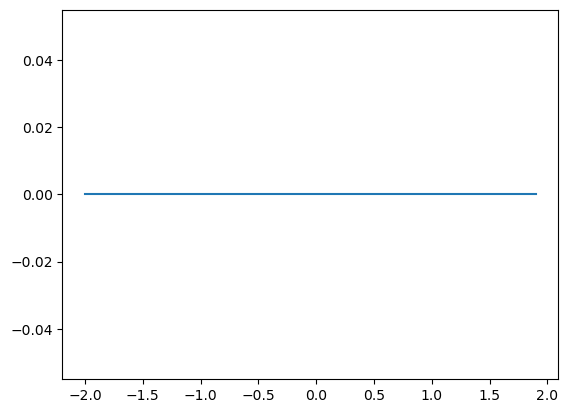

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa7a8208e10>

In [226]:
plot(xpoints, potential.(xpoints))

In [227]:
V = SparseOperator(b, diagm(potential.(xpoints)))

Operator(dim=40x40)
  basis: NLevel(N=40)sparse(Int64[], Int64[], Float64[], 40, 40)

In [228]:
t = 1/dx/dx

Htb = SparseOperator(b)

for i in 1:N-1
    Htb += -t*transition(b,i+1,i)
end
# PBC
Htb += -t*transition(b,1,N)

Htb += Htb'

for i in 1:N
    Htb += 2*t*transition(b,i,i)
end

In [229]:
H = Htb + V
H = dense(H);

In [230]:
E, states = eigenstates((H + dagger(H))/2);

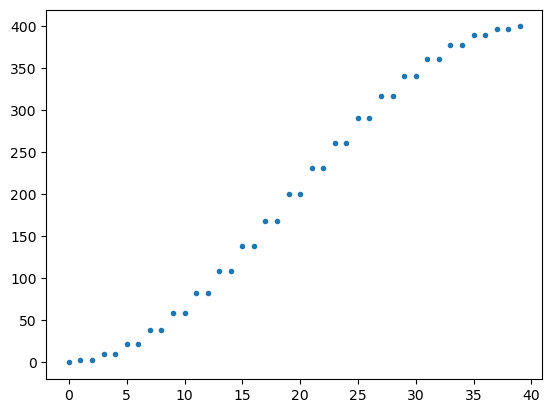

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa7a8279f50>

In [231]:
plot(E, ".")

In [232]:
E[1:10]

10-element Vector{Float64}:
  1.1368683772161603e-13
  2.4623318809724424
  2.4623318809727266
  9.788696740969385
  9.788696740969499
 21.79869516232668
 21.79869516232685
 38.196601125010545
 38.1966011250106
 58.57864376269072

In [233]:
Nparticles = 2
states = fermionstates(b, Nparticles)

780-element QuantumOpticsBase.SortedVector{Vector{Int64}, Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}}:
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0,

In [234]:
b_mb = ManyBodyBasis(b, states)

ManyBody(onebodybasis=NLevel(N=40), states:780)

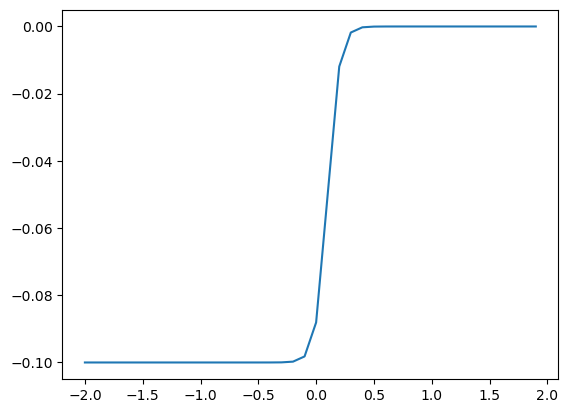

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa7a806f0d0>

In [244]:
b2_position = b ⊗ b
x1 = embed(b2_position, 1, x)
x2 = embed(b2_position, 2, x);
r = x1 - x2

V0 = 0.1
r0 = 0.1
w0 = 0.1

V_SQWell = r -> V0*(tanh( (r-r0)/w0 )-1)/2
plot(xpoints, V_SQWell.(xpoints))

In [236]:
SQWell = sparse(diagm(0 => V_SQWell.(diag(dense(r).data))))

1600×1600 SparseArrays.SparseMatrixCSC{Float64, Int64} with 1410 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎦

In [237]:
H_SQWell = SparseOperator(b2_position, b2_position, SQWell)

Operator(dim=1600x1600)
  basis: [NLevel(N=40) ⊗ NLevel(N=40)]sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600], [-0.08807970779778825, -0.04999999999999996, -0.01192029220221177, -0.00179862099620916, -0.00024726231566348, -3.353501304665e-5, -4.53978687024e-6, -6.1441746022e-7, -8.315280277e-8, -1.125351621e-8  …  -0.09999999979388464, -0.09999999847700206, -0.0999999887464838, -0.09999991684719724, -0.0999993855825398, -0.09999546021312976, -0.09996646498695336, -0.09975273768433653, -0.09820137900379083, -0.08807970779778825], 1600, 1600)

In [238]:
Hkin_mb = manybodyoperator(b_mb, dense(Htb))
Vext_mb = manybodyoperator(b_mb, V)
Vint_mb = manybodyoperator(b_mb, H_SQWell)

Operator(dim=780x780)
  basis: ManyBody(onebodybasis=NLevel(N=40), states:780)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  771, 772, 773, 774, 775, 776, 777, 778, 779, 780], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  771, 772, 773, 774, 775, 776, 777, 778, 779, 780], ComplexF64[-0.14820137900379082 + 0.0im, -0.1116730298865483 + 0.0im, -0.10176508598316251 + 0.0im, -0.10024272252879324 + 0.0im, -0.10003292059558644 + 0.0im, -0.10000445663406748 + 0.0im, -0.10000060316394402 + 0.0im, -0.10000008162980482 + 0.0im, -0.10000001104740085 + 0.0im, -0.10000000149510326 + 0.0im  …  -0.14820137900379082 + 0.0im, -0.1116730298865483 + 0.0im, -0.10176508598316251 + 0.0im, -0.10024272252879324 + 0.0im, -0.14820137900379093 + 0.0im, -0.1116730298865483 + 0.0im, -0.10176508598316251 + 0.0im, -0.14820137900379082 + 0.0im, -0.1116730298865483 + 0.0im, -0.14820137900379093 + 0.0im], 780, 780)

In [239]:
H_mb = Hkin_mb + Vext_mb + Vint_mb;

In [240]:
E2, U2 = eigenstates((H_mb+dagger(H_mb))/2);

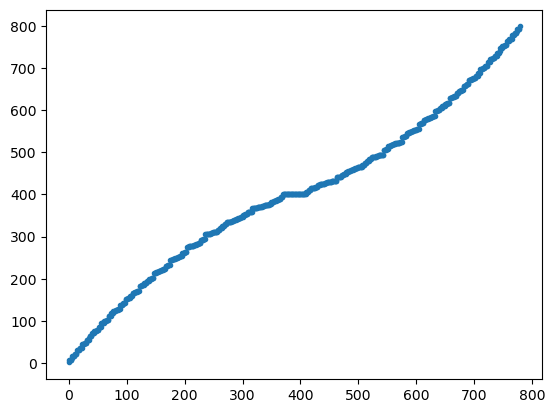

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa7a817d310>

In [241]:
plot(E2,".")

In [242]:
E2[1:100]

100-element Vector{Float64}:
   1.1329989218697842
   6.042273156550825
   6.042296587966789
   6.042478632665434
   6.042485346560683
  10.951460985586088
  15.74003150874848
  15.740076394220036
  15.740352455613024
  15.740377127180455
  20.649105117866412
  20.649189183972812
  20.650039491007604
   ⋮
 128.88749694456163
 138.58376034064293
 138.58396049263126
 138.58598651532026
 138.58602159861402
 140.11693174655102
 143.31511758079836
 143.31537160480775
 143.3188286043354
 143.31883222656637
 152.83131383976325
 152.8315456686097